# **Enhancing Maternal Health in Nigeria**
* Nigeria's maternal mortality ratio is extremely high with over 1000 maternal deaths per 100,000 live births.
* This analysis is a part of Omdena local chapter Enhancing Maternal Health machine learning project.
* According to World Health Organization, the high number of maternal deaths in some areas of the world reflects inequalities in access to quality health services and highlights the gap between rich and poor (World Health Organization, 2023, February 22).
	References</br>
		(2023, February 22), https://www.who.int/news-room/fact-sheets/detail/maternal-mortality


* The dataset contains 41821 survey results from 2018, involving women from 37 states.
* It originally had 357 features related to various aspects of the individuals’ lives, including education level, marital status, family status, physical condition, and financial status.
* After careful examination, 9 features were selected that could significantly contribute to women’s health in Nigeria.
* The target variable, ‘risk_ratio’, was derived from other features in the dataset.

* Ridge, XGBRegressor, and RandomForestRegressor models were created with no parameter tuned.

* Sets of hyperparameters were selected for XGBRegressor and RandomForestRegressor. The best combination was choosen using RandomSearchCV.

* The best models were created with the best parameters.

**Model Performance**
* Tuned XGBRegressor marked MSE of 1.745, which shows an excellent performance.

|index|Base XGBRegressor|**Tuned XGBRegressor**|
| -- | -- | -- |
|R2 Score|0.9960657250731368|0.996105|
|MSE|1.7629756483529457|1.745207|
|RMSE|1.3277709321840667|1.321063|
|MAE|0.5951197202389148|0.295187|

* Dataset
	* NGIR7BFL.SAV is available at The DHS Program (Demographic and Health Surveys) Website  
	* NGIR7BFL.MAP is a data dictionary that is also available from the below URL
	* URL: https://dhsprogram.com/data/dataset/Nigeria_Standard-DHS_2018.cfm?flag=0



In [ ]:
# matplotlib.__version__

In [ ]:
# !pip install pyreadstat
# !pip install matplotlib --user
# !pip install --upgrade matplotlib
# !pip install --upgrade pip
# !pip uninstall matplotlib
# !pip install matplotlib


In [ ]:
# !pip show matplotlib

### **1. Import Libraries**

In [1]:
#### Import the libraries needed
import pickle
# import dill
import json
import os
from pathlib import Path

# import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!pip show

### **2. Set up the Environment**

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set up directory
# working_directory = Path.cwd()
# # data_directory = working_directory/"_data"
# data_directory = working_directory
PROJECT_ROOT_PATH = Path.cwd()

# define the data folder path and file
RAW_DATA_PATH = os.path.join(PROJECT_ROOT_PATH, 'data')

In [3]:
# Set pd.options to add slide bars
# pd.set_option('display.max_rows', 10)       # Display only 10  rows
# pd.set_option('display.max_columns', 10)    # Display only 10  columns
pd.set_option("display.max_rows", None)     # Add a vertical scroll bar
pd.set_option('display.max_columns', None)  # Add a horizontal scroll bar

In [6]:
# Set default title color
plt.style.use('fivethirtyeight')
# Set default title color
plt.rcParams.update({'text.color': "#333333", 'axes.labelcolor': "#333333"})

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# figure suptitle
plt.rcParams["figure.titlesize"] = 26
plt.rcParams["figure.titleweight"] = "bold"
# set default plt font size
# plt.rcParams["font.size"] = 24
# font weight
# plt.rcParams["font.weight"] = "bold"
# title location
plt.rcParams["axes.titlelocation"] = "left"
# title size
plt.rcParams["axes.titlesize"] = 18
# title wight
plt.rcParams["axes.titleweight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# spines
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
# axis labels
# plt.rcParams["xaxis.labellocation"] = "left"
# plt.rcParams["yaxis.labellocation"] = "top"
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams.update({'text.color': "#333333", 'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})
plt.rcParams["font.weight"] = "bold"

### **3. Load Data**
* 'selected_relevant_df.csv' has 41821 observations and 10 features
* The target variable is 'risk_ratio'
* Data dictionary: '7GIR7BSV_description_df.csv'
* Data source URL: https://github.com/OmdenaAI/kano-nigeria-maternal-health/blob/main/src/tasks/task-2-EDA_BrooksChristensen/final_df.csv


--------------- From next time, skip these cells ---------------

In [4]:
# Load 'NGPR7BFL.SAV'
file_path = os.path.join(RAW_DATA_PATH, 'selected_relevant_df.csv')
#file_path = "/content/drive/MyDrive/Nigeria Enhancing Maternal Health/data/selected_relevant_df.csv"
df = pd.read_csv(file_path)

In [5]:
df.head(5)

,V012,V133,V201,V501,V504,SSTATE,V130,V131,V463A,risk_ratio
0,40.0,15.0,3.0,Living with partner,Staying elsewhere,Benue,Other Christian,Igbo,No,12.679101
1,16.0,10.0,0.0,Never in union,NaN,Benue,Other Christian,Tiv,No,5.252712
2,37.0,15.0,3.0,Married,Living with her,Benue,Catholic,Tiv,No,7.436423
3,27.0,14.0,1.0,Married,Living with her,Benue,Other Christian,Other,No,4.361538
4,29.0,12.0,0.0,Never in union,NaN,Benue,Other Christian,Other,No,5.901923


In [ ]:
df.shape

(41821, 10)

In [6]:
# Load the
file_path = os.path.join(RAW_DATA_PATH, '7GIR7BSV_description_df.csv')
# file_path = "/content/drive/MyDrive/Nigeria Enhancing Maternal Health/data/NGIR7BFL_description_df.csv"
description_df = pd.read_csv(file_path, index_col=0)

In [7]:
# replace colums in df with the description in description_df
cols = description_df[description_df.index.isin(df.columns)]['description']
idx_desc_map = {cols.index[i]: cols.values[i] for i in range(len(cols))}

In [8]:
df.rename(columns=idx_desc_map, inplace=True)
df.head()

,Respondent's current age,Education in single years,Total children ever born,Current marital status,Currently residing with husband/partner,State of residence,Religion,Ethnicity,Smokes cigarettes,risk_ratio
0,40.0,15.0,3.0,Living with partner,Staying elsewhere,Benue,Other Christian,Igbo,No,12.679101
1,16.0,10.0,0.0,Never in union,NaN,Benue,Other Christian,Tiv,No,5.252712
2,37.0,15.0,3.0,Married,Living with her,Benue,Catholic,Tiv,No,7.436423
3,27.0,14.0,1.0,Married,Living with her,Benue,Other Christian,Other,No,4.361538
4,29.0,12.0,0.0,Never in union,NaN,Benue,Other Christian,Other,No,5.901923


In [ ]:
# Save the dataframe with meaningful column header
# file_path = os.path.join(RAW_DATA_PATH, 'selected_7GIR7BSV.csv')
# df.to_csv(file_path, index=False)

-------------------------------------------------------------------------

### **3. Load Data Dictionary - 'selected_7GIR7BSV.csv'**


In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Load 'selected_7GIR7BSV.csv'
file_path = os.path.join(RAW_DATA_PATH, 'selected_7GIR7BSV.csv')
# file_path = '/content/drive/MyDrive/Nigeria Enhancing Maternal Health/data/selected_7GIR7BSV.csv'
df = pd.read_csv(file_path)

### 4. **Descriptive Statistics**

In [9]:
df.shape

(41821, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41821 entries, 0 to 41820
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Respondent's current age                 41821 non-null  float64
 1   Education in single years                41821 non-null  float64
 2   Total children ever born                 41821 non-null  float64
 3   Current marital status                   41821 non-null  object 
 4   Currently residing with husband/partner  28888 non-null  object 
 5   State of residence                       41821 non-null  object 
 6   Religion                                 41821 non-null  object 
 7   Ethnicity                                41821 non-null  object 
 8   Smokes cigarettes                        41821 non-null  object 
 9   risk_ratio                               41821 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.2+ MB

In [11]:
df.describe()

,Respondent's current age,Education in single years,Total children ever born,risk_ratio
count,41821.000000,41821.000000,41821.000000,41821.000000
mean,29.159585,6.690371,3.049784,20.903067
std,9.706108,5.576020,2.957107,21.516935
min,15.000000,0.000000,0.000000,0.890000
25%,20.000000,0.000000,0.000000,5.988091
50%,28.000000,7.000000,2.000000,14.283718
75%,37.000000,12.000000,5.000000,27.202282
max,49.000000,20.000000,17.000000,204.132212


In [12]:
df.describe(include='object')

,Current marital status,Currently residing with husband/partner,State of residence,Religion,Ethnicity,Smokes cigarettes
count,41821,28888,41821,41821,41821,41821
unique,6,2,37,5,12,2
top,Married,Living with her,Kano,Islam,Other,No
freq,27841,26199,1983,20959,11404,41725


In [10]:
# Check numerical and categorical columns
numerical_cols = [col for col in df if df[col].dtypes != 'O']
categorical_cols = [col for col in df if df[col].dtypes == 'O']

print(f"{len(numerical_cols)} Numerical Columns: {numerical_cols}")
print(f"{len(categorical_cols)} Categorical Columns: {categorical_cols}")

4 Numerical Columns: ["Respondent's current age", 'Education in single years', 'Total children ever born', 'risk_ratio']
6 Categorical Columns: ['Current marital status', 'Currently residing with husband/partner', 'State of residence', 'Religion', 'Ethnicity', 'Smokes cigarettes']


In [11]:
for col in categorical_cols:
  print("Unique values: ", col)
  print(df[col].unique())
  print()

Unique values:  Current marital status
['Living with partner' 'Never in union' 'Married'
 'No longer living together/separated' 'Widowed' 'Divorced']

Unique values:  Currently residing with husband/partner
['Staying elsewhere' nan 'Living with her']

Unique values:  State of residence
['Benue' 'FCT Abuja' 'Kogi' 'Kwara' 'Nasarawa' 'Niger' 'Plateau' 'Adamawa'
 'Bauchi' 'Borno' 'Gombe' 'Taraba' 'Yobe' 'Jigawa' 'Kaduna' 'Kano'
 'Katsina' 'Kebbi' 'Sokoto' 'Zamfara' 'Abia' 'Anambra' 'Ebonyi' 'Enugu'
 'Imo' 'Akwa Ibom' 'Bayelsa' 'Cross River' 'Delta' 'Edo' 'Rivers' 'Ekiti'
 'Lagos' 'Ogun' 'Ondo' 'Osun' 'Oyo']

Unique values:  Religion
['Other Christian' 'Catholic' 'Islam' 'Traditionalist' 'Other']

Unique values:  Ethnicity
['Igbo' 'Tiv' 'Other' 'Hausa' 'Igala' 'Ijaw/Izon' 'Yoruba' 'Fulani'
 'Kanuri/Beriberi' 'Ibibio' "Don't know" 'Ekoi']

Unique values:  Smokes cigarettes
['No' 'Yes']



In [14]:
cols = df.columns
cols

Index(['Respondent's current age', 'Education in single years',
       'Total children ever born', 'Current marital status',
       'Currently residing with husband/partner', 'State of residence',
       'Religion', 'Ethnicity', 'Smokes cigarettes', 'risk_ratio'],
      dtype='object')

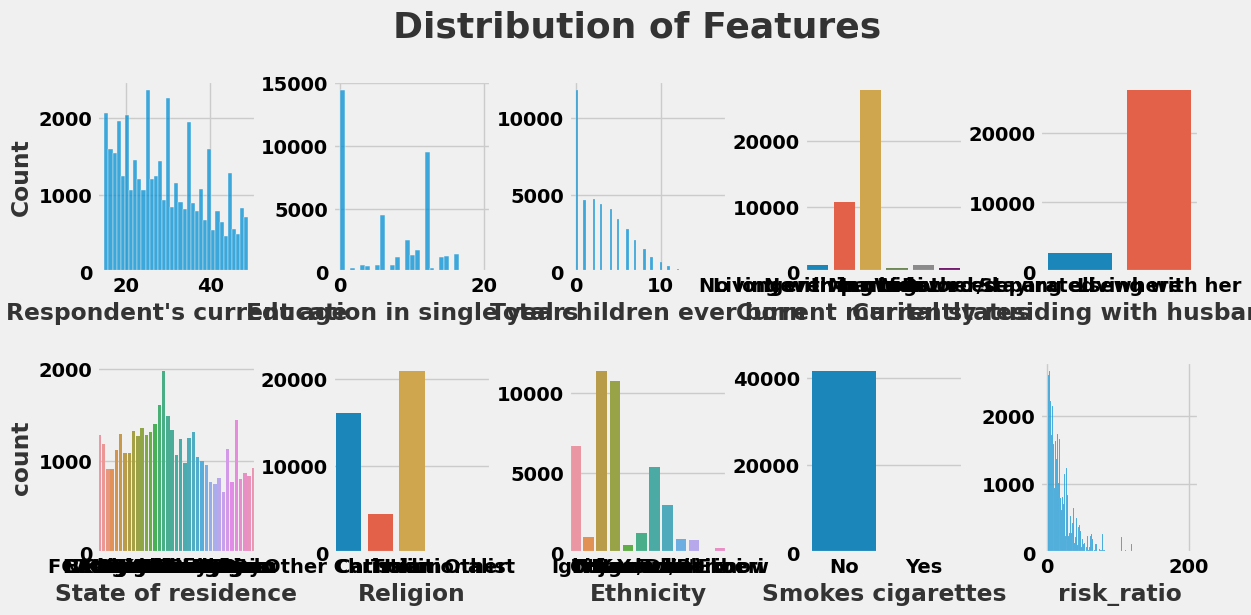

In [15]:
# Distribution of variables
r = 2
c = 5

fig, axs =  plt.subplots(r, c, figsize=(12, 6))
plt.suptitle("Distribution of Features")
fig.tight_layout(h_pad=3)

for i in range(len(cols)):
    if cols[i] in categorical_cols:
        sns.countplot(x=cols[i], data=df, ax=axs[i//c, i%c])
    else:
        sns.histplot(x=cols[i], data=df, ax=axs[i//c, i%c])
    if i % c != 0:
        axs[i//c, i%c].set_ylabel("");

<Figure size 1000x500 with 0 Axes>

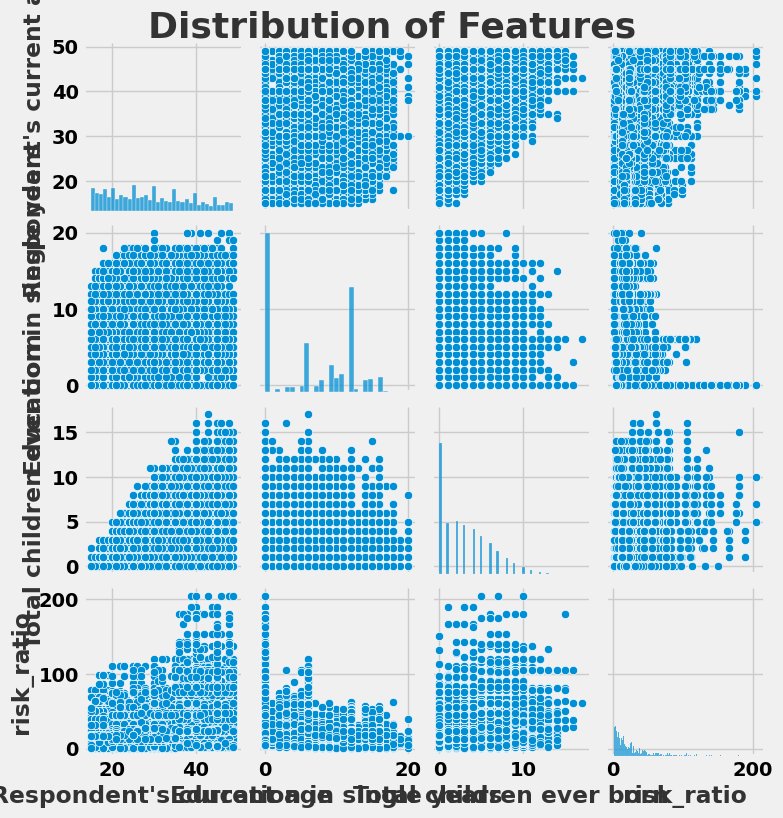

In [16]:
# fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure()
g = sns.pairplot(df,  height=2)
g.fig.suptitle("Distribution of Features", y=1.02);

## **Handle Null Values**
* 'Currently residing with husband/partner' has 12,633 null values
* Respondents may be single: a value in the 'Current marital status' columns is in one of these statuses: 'Never married', 'Widowed' or 'Divorced'

* If the value of 'Currently residing with husband/partner' is 'No longer living together/separated', replace null with 'Staying elsewhere'
* Otherwise, fill nan with 'Not Available (single)'


In [12]:
df['Currently residing with husband/partner'].unique()

array(['Staying elsewhere', nan, 'Living with her'], dtype=object)

In [13]:
# Check values in 'Current marital status'
df.loc[df['Currently residing with husband/partner'].isna(), 'Current marital status'].unique()

# Fill null values based on the above rules:
for i in range(len(df)):
  if pd.isna(df.loc[i, 'Currently residing with husband/partner']) & (df.loc[i, 'Current marital status'] == 'No longer living together/separated'):
    df.loc[i, 'Currently residing with husband/partner'] = 'Staying elsewhere'
  elif (df.loc[i, 'Current marital status'] in ['Never in union', 'Widowed', 'Divorced']):
    df.loc[i, 'Currently residing with husband/partner'] = 'Not Available (single)'

df['Currently residing with husband/partner'].isna().sum()

0

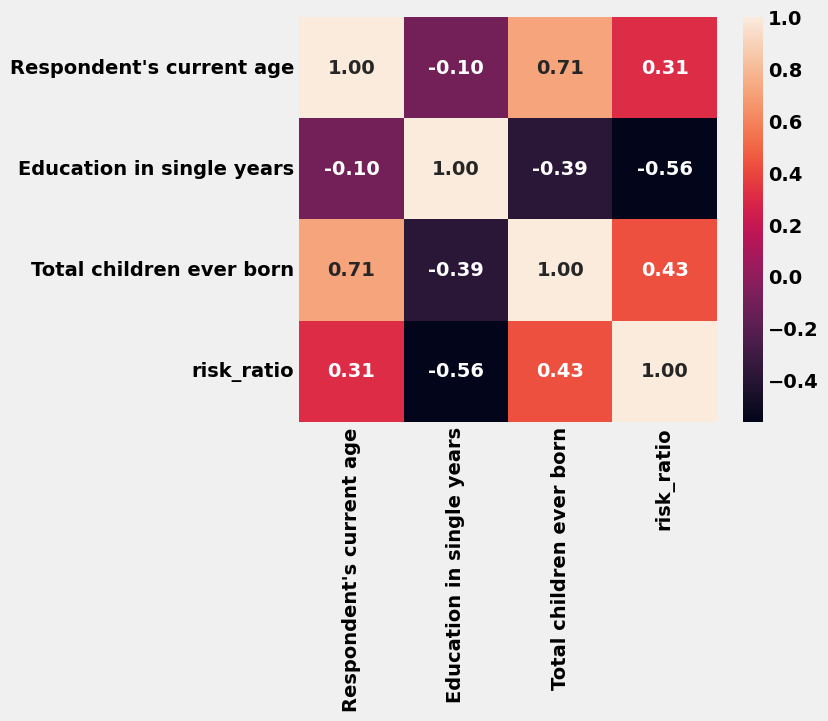

In [90]:
cor = df[numerical_cols].corr()
fig = plt.figure(figsize=(6, 5))
sns.heatmap(cor, annot=True, fmt=".2f")
g.fig.suptitle("Distribution of Features", y=1.02);

# **Model Creation**


## **Import Modules**

In [21]:
# !pip install xgboost
# !pip install shap

In [14]:
# Import modules
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import shap

## **Prepare Training and Test Datasets**

* One-hot encoding the dataset

In [15]:
# One-hot encode categorical variables
ohe_df = pd.get_dummies(df, drop_first=True, columns=categorical_cols)

In [92]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41821 entries, 0 to 41820
Data columns (total 63 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Respondent's current age                                        41821 non-null  float64
 1   Education in single years                                       41821 non-null  float64
 2   Total children ever born                                        41821 non-null  float64
 3   risk_ratio                                                      41821 non-null  float64
 4   Current marital status_Living with partner                      41821 non-null  uint8  
 5   Current marital status_Married                                  41821 non-null  uint8  
 6   Current marital status_Never in union                           41821 non-null  uint8  
 7   Current marital status_No longer living together/

In [93]:
ohe_df.head()

,Respondent's current age,Education in single years,Total children ever born,risk_ratio,Current marital status_Living with partner,Current marital status_Married,Current marital status_Never in union,Current marital status_No longer living together/separated,Current marital status_Widowed,Currently residing with husband/partner_Not Available (single),Currently residing with husband/partner_Staying elsewhere,State of residence_Adamawa,State of residence_Akwa Ibom,State of residence_Anambra,State of residence_Bauchi,State of residence_Bayelsa,State of residence_Benue,State of residence_Borno,State of residence_Cross River,State of residence_Delta,State of residence_Ebonyi,State of residence_Edo,State of residence_Ekiti,State of residence_Enugu,State of residence_FCT Abuja,State of residence_Gombe,State of residence_Imo,State of residence_Jigawa,State of residence_Kaduna,State of residence_Kano,State of residence_Katsina,State of residence_Kebbi,State of residence_Kogi,State of residence_Kwara,State of residence_Lagos,State of residence_Nasarawa,State of residence_Niger,State of residence_Ogun,State of residence_Ondo,State of residence_Osun,State of residence_Oyo,State of residence_Plateau,State of residence_Rivers,State of residence_Sokoto,State of residence_Taraba,State of residence_Yobe,State of residence_Zamfara,Religion_Islam,Religion_Other,Religion_Other Christian,Religion_Traditionalist,Ethnicity_Ekoi,Ethnicity_Fulani,Ethnicity_Hausa,Ethnicity_Ibibio,Ethnicity_Igala,Ethnicity_Igbo,Ethnicity_Ijaw/Izon,Ethnicity_Kanuri/Beriberi,Ethnicity_Other,Ethnicity_Tiv,Ethnicity_Yoruba,Smokes cigarettes_Yes
0,40.0,15.0,3.0,12.679101,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16.0,10.0,0.0,5.252712,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37.0,15.0,3.0,7.436423,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27.0,14.0,1.0,4.361538,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,29.0,12.0,0.0,5.901923,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
ohe_df.shape

(41821, 63)

* split training and test datasets

In [16]:
# Create dependent variables and independent variable
X = ohe_df.drop('risk_ratio', axis=1)
y = ohe_df['risk_ratio']

In [ ]:
# # Convert datatype from boolean to integer
# bool_cols = X.select_dtypes(bool)
# bool_cols
# # X[bool_cols] = X[bool_cols].astype(float)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Scale numerical variable

In [21]:
X_train.head()

,Respondent's current age,Education in single years,Total children ever born,Current marital status_Living with partner,Current marital status_Married,Current marital status_Never in union,Current marital status_No longer living together/separated,Current marital status_Widowed,Currently residing with husband/partner_Not Available (single),Currently residing with husband/partner_Staying elsewhere,State of residence_Adamawa,State of residence_Akwa Ibom,State of residence_Anambra,State of residence_Bauchi,State of residence_Bayelsa,State of residence_Benue,State of residence_Borno,State of residence_Cross River,State of residence_Delta,State of residence_Ebonyi,State of residence_Edo,State of residence_Ekiti,State of residence_Enugu,State of residence_FCT Abuja,State of residence_Gombe,State of residence_Imo,State of residence_Jigawa,State of residence_Kaduna,State of residence_Kano,State of residence_Katsina,State of residence_Kebbi,State of residence_Kogi,State of residence_Kwara,State of residence_Lagos,State of residence_Nasarawa,State of residence_Niger,State of residence_Ogun,State of residence_Ondo,State of residence_Osun,State of residence_Oyo,State of residence_Plateau,State of residence_Rivers,State of residence_Sokoto,State of residence_Taraba,State of residence_Yobe,State of residence_Zamfara,Religion_Islam,Religion_Other,Religion_Other Christian,Religion_Traditionalist,Ethnicity_Ekoi,Ethnicity_Fulani,Ethnicity_Hausa,Ethnicity_Ibibio,Ethnicity_Igala,Ethnicity_Igbo,Ethnicity_Ijaw/Izon,Ethnicity_Kanuri/Beriberi,Ethnicity_Other,Ethnicity_Tiv,Ethnicity_Yoruba,Smokes cigarettes_Yes
29509,18,11,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
26068,24,8,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
33219,34,8,5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
5844,22,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7348,29,5,5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Standardize numerical columns in X_train
nume_cols = X_train.select_dtypes(include=[float]).columns
scaler = MinMaxScaler()
scaler.fit(X_train[nume_cols])
X_train[nume_cols] = scaler.transform(X_train[nume_cols])
X_train[:5]

In [98]:
# Standardize numerical columns in X_train
X_test[nume_cols] = scaler.transform(X_test[nume_cols])
X_test[:5]

,Respondent's current age,Education in single years,Total children ever born,Current marital status_Living with partner,Current marital status_Married,Current marital status_Never in union,Current marital status_No longer living together/separated,Current marital status_Widowed,Currently residing with husband/partner_Not Available (single),Currently residing with husband/partner_Staying elsewhere,State of residence_Adamawa,State of residence_Akwa Ibom,State of residence_Anambra,State of residence_Bauchi,State of residence_Bayelsa,State of residence_Benue,State of residence_Borno,State of residence_Cross River,State of residence_Delta,State of residence_Ebonyi,State of residence_Edo,State of residence_Ekiti,State of residence_Enugu,State of residence_FCT Abuja,State of residence_Gombe,State of residence_Imo,State of residence_Jigawa,State of residence_Kaduna,State of residence_Kano,State of residence_Katsina,State of residence_Kebbi,State of residence_Kogi,State of residence_Kwara,State of residence_Lagos,State of residence_Nasarawa,State of residence_Niger,State of residence_Ogun,State of residence_Ondo,State of residence_Osun,State of residence_Oyo,State of residence_Plateau,State of residence_Rivers,State of residence_Sokoto,State of residence_Taraba,State of residence_Yobe,State of residence_Zamfara,Religion_Islam,Religion_Other,Religion_Other Christian,Religion_Traditionalist,Ethnicity_Ekoi,Ethnicity_Fulani,Ethnicity_Hausa,Ethnicity_Ibibio,Ethnicity_Igala,Ethnicity_Igbo,Ethnicity_Ijaw/Izon,Ethnicity_Kanuri/Beriberi,Ethnicity_Other,Ethnicity_Tiv,Ethnicity_Yoruba,Smokes cigarettes_Yes
3905,0.823529,0.60,0.235294,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40143,0.088235,0.50,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35665,0.323529,0.75,0.058824,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
27736,0.000000,0.45,0.000000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
28427,0.117647,0.50,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [99]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (29274, 62)
X_test:  (12547, 62)


## **Base Model Creation**
* Ridge
* XGBoost Regressor
* RandomForest Regressor

| Metrics | Ridge | XGBRegressor | RandomForestRegressor |
| --- | --- | --- | --- |
|R2 Score | 0.792991	| 0.996066 |	0.993271 |
|MSE  |	92.762134  |	1.762976  |	3.015217 |
|RMSE |	9.631310  |	1.327771  |	1.736438 |

In [100]:
# Function to fit a model
def fit_model(model, X_training, y_training):
    fitted_model = model.fit(X_training, y_training)
    return fitted_model

# Function to create a model and return prediction
def get_prediction(fitted_model, X_testing):
    pred = fitted_model.predict(X_testing)
    return pred

# Function to evaluate model
def evaluate_model(metrics, y_testing, prediction):
    return metrics(y_testing, prediction)

In [103]:
# Fit base models, predict and evaluate
models = [Ridge(), xgb.XGBRegressor(), RandomForestRegressor()]
model_names = ["Ridge", "XGBRegressor", "RandomForestRegressor"]
metrics = [r2_score, mean_squared_error, mean_absolute_error]
base_predictions = []
base_performance_score = {}

for i in range(len(models)):
    model = fit_model(models[i], X_train, y_train)
    pred = get_prediction(model, X_test)
    base_predictions.append(pred)
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], y_test, pred))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], y_test, pred)))
    base_performance_score[model_names[i]] = scores

## **Base Model Evaluation**

In [104]:
# Compare base models
base_metrics_df = pd.DataFrame(base_performance_score, index=["R2 Score", 'MSE', 'RMSE', 'MAE'])
base_metrics_df

,Ridge,XGBRegressor,RandomForestRegressor
R2 Score,0.792991,0.996066,0.993433
MSE,92.762134,1.762976,2.942902
RMSE,9.631310,1.327771,1.715489
MAE,6.452308,0.595120,0.296562


from matplotlib import pyplot as plt
_df_0['Ridge'].plot(kind='hist', bins=20, title='Ridge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['XGBRegressor'].plot(kind='hist', bins=20, title='XGBRegressor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RandomForestRegressor'].plot(kind='hist', bins=20, title='RandomForestRegressor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Ridge', y='XGBRegressor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='XGBRegressor', y='RandomForestRegressor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Ridge'].plot(kind='line', figsize=(8, 4), title='Ridge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['XGBRegressor'].plot(kind='line', figsize=(8, 4), title='XGBRegressor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['RandomForestRegressor'].plot(kind='line', figsize=(8, 4), title='RandomForestRegressor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Ridge', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='XGBRegressor', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='RandomForestRegressor', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Hyperparameter Tuning**

* Tune hyperparameters for **XGBRegressor**
best_xgb_params = {'reg_lambda': 3,
                   'reg_alpha': 1,
                   'objective': 'reg:squarederror', 'n_estimators': 200, 'min_child_weight': 3,
                   'max_depth': 10,
                   'learning_rate': 0.1,
                   'gamma': 2,
                   'colsample_bytree': 0.8,
                   'booster': 'gbtree'}

In [40]:
# Define the parameter grid
xgb_params = {
    'objective': ['reg:squarederror'],
    'booster': ['gbtree', 'gblinear'],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 2, 3],
    'colsample_bytree': [0.8, 0.9, 1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.5, 1, 2],
    'reg_lambda': [1, 2, 3],
    'gamma': [0, 1, 2]
}

# Create an XGBRegressor object
xgb_model = xgb.XGBRegressor(random_state=327)

# Create a RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(xgb_model,
                                       xgb_params,
                                       cv=5,
                                       n_iter=15,
                                       scoring='neg_mean_absolute_error',
                                       verbose=5,
                                       n_jobs=12)

In [106]:
# Fit xgb_random_search and get the best hyperparameters
xgb_random_search.fit(X_train, y_train)
best_xgb_params = xgb_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
print(best_xgb_params)

{'reg_lambda': 3, 'reg_alpha': 1, 'objective': 'reg:squarederror', 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


* Tune hyperparameters for **RandomForestRegressor**
* best_rfr_params = {'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 19, 'bootstrap': False}

In [43]:
# Define the grid of hyperparameters to search
rfr_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': np.linspace(0.1, 1.0, 10),
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [x for x in range(1,20)],
    'n_estimators': [100, 200, 300, 400, 500],
    'bootstrap': [True, False]
}

# Create an XGBRegressor object
rfr_model = RandomForestRegressor(random_state=327)

# Create a RandomizedSearchCV object
rfr_random_search = RandomizedSearchCV(rfr_model,
                                       rfr_params,
                                       cv=10, # 10
                                       n_iter=50, # 50
                                       scoring='neg_mean_absolute_error',
                                       verbose=5,
                                       n_jobs=-1) # -1

In [107]:
# Fit rfr_random_search and get the best hyperparameters
rfr_random_search.fit(X_train, y_train)
best_rfr_params = rfr_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_rfr_model = RandomForestRegressor(**best_rfr_params)

# Train the model
best_rfr_model.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomForestRegressor(bootstrap=False, max_depth=18, max_features='auto',
                      min_samples_leaf=4, min_samples_split=0.1,
                      n_estimators=400)

In [48]:
print(best_rfr_params)

{'n_estimators': 300, 'min_samples_split': 0.1, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 19, 'bootstrap': False}


In [108]:
# Fit the RandomizedSearchCV object to the data
tuned_models = [best_xgb_model, best_rfr_model]
tuned_model_names = ['Tuned XGBRegressor', 'Tuned RandomForestRegressor']
metrics = [r2_score, mean_squared_error, mean_absolute_error]
tuned_predictions = []
tuned_performance_score = {}

for i in range(len(tuned_models)):
    model = tuned_models[i]
    pred = get_prediction(model, X_test)
    tuned_predictions.append(pred)
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], y_test, pred))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], y_test, pred)))
    tuned_performance_score[tuned_model_names[i]] = scores

## **Tuned Model Evaluation**
* Hyperparameter optimized XGBRegressor records the highest performance with the R2 score of 0.997, MSE of 1.21, and RMSE of 1.10.

In [109]:
# Compare tuned models
tuned_metrics_df = pd.DataFrame(tuned_performance_score, index=["R2 Score", 'MSE', 'RMSE', 'MAE'])
tuned_metrics_df

,Tuned XGBRegressor,Tuned RandomForestRegressor
R2 Score,0.996105,0.732892
MSE,1.745207,119.693124
RMSE,1.321063,10.940435
MAE,0.295187,6.170740


In [119]:
# Save the best model in pickl
with open('/content/drive/MyDrive/Nigeria Enhancing Maternal Health/xgb_model_pkl.pkl', 'wb') as files:
    pickle.dump(best_xgb_model, files)

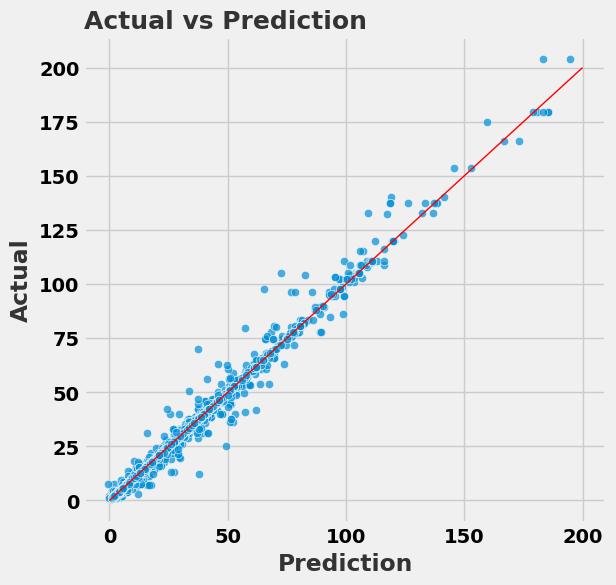

In [137]:
# Check Actual vs. Prediction
xgb_preds = tuned_predictions[0]
actual = y_test.values
fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Actual vs Prediction")
sns.scatterplot(x=xgb_preds, y=actual, ax=ax, alpha=0.7)
sns.lineplot(x=[0, 200], y=[0, 200], color='r', ax=ax, lw=1)
ax.set_xlabel("Prediction")
ax.set_ylabel('Actual');

## **Feature Importances**
* The feature 'Education in single years' has the greatest impact on the risk ratio. As the value of this feature increases, the 'risk_ratio' target variable decreases. This suggests that individuals with higher levels of education have a lower risk ratio.
* The feature for "Respondent's current age" contributes to the 'risk_ratio' beside 'Education in single years'. The value in "Respondent's current age" increases, 'risk_ratio' increases as well.
* Marital status also contribute to the 'risk_ratio', where married individuals have lower 'risk_ratio'.
* Resident status in Adamawa and Katsina increase 'risk_ratio'



100%|===================| 8343/8365 [02:08<00:00]       

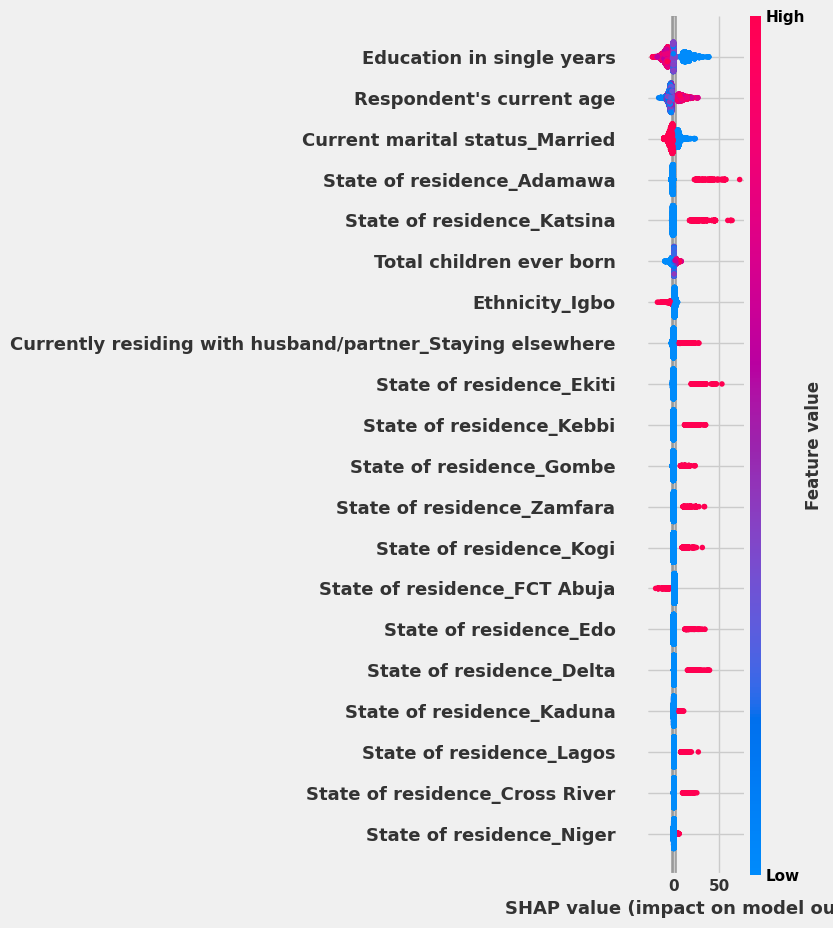

In [52]:
# Create a SHAP explainer and calculate SHAP values
explainer = shap.Explainer(best_xgb_model, X_test)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

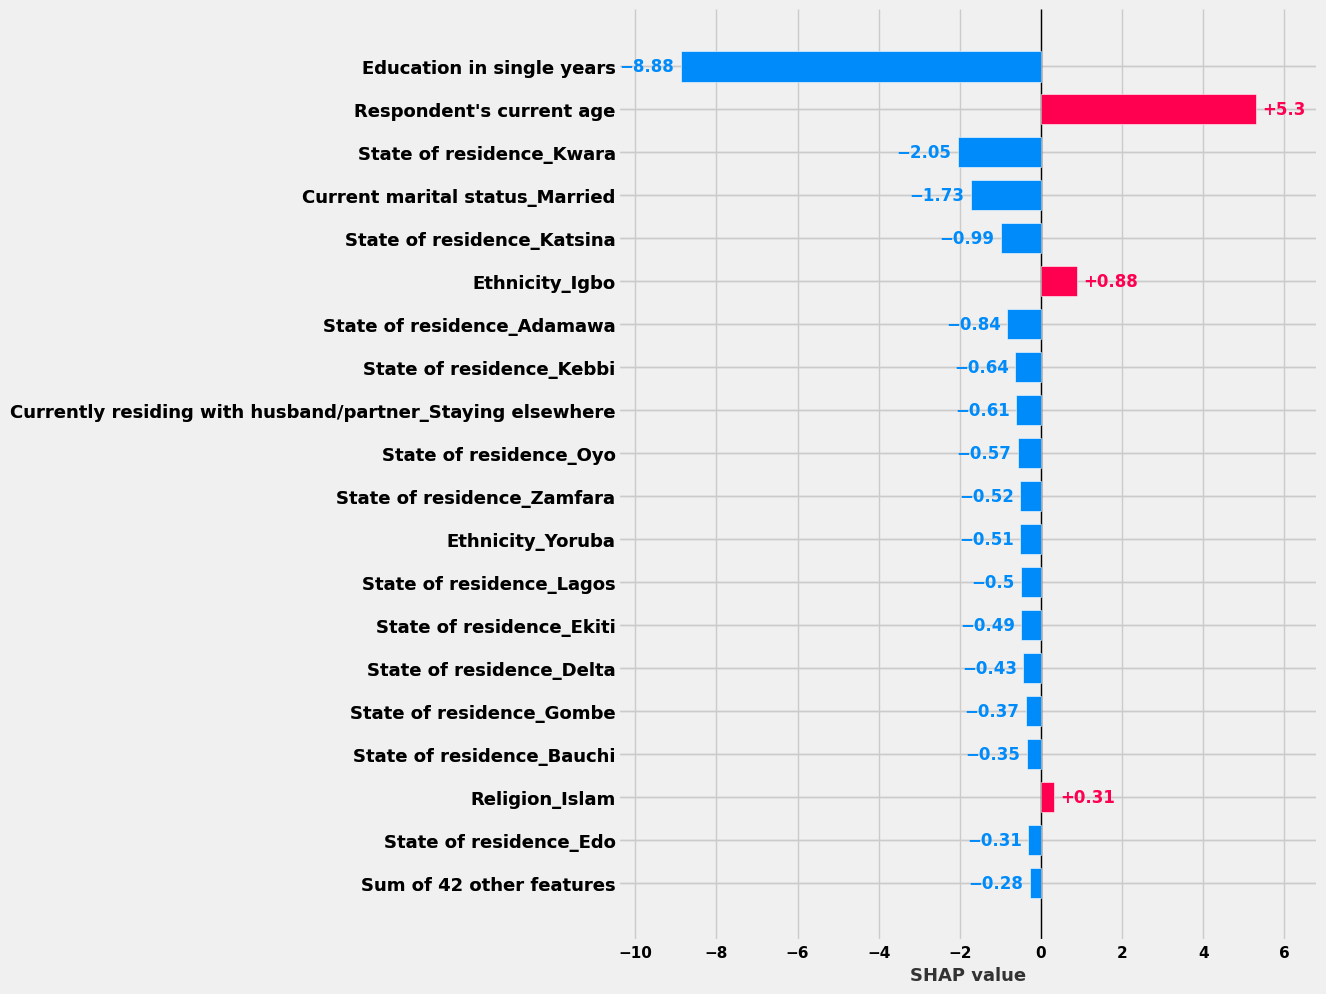

In [53]:

explainer_xgb= shap.Explainer(best_xgb_model, algorithm='tree')
shap_values_xgb = explainer_xgb(X_test)

# Visualize the SHAP values
shap.plots.bar(shap_values_xgb[0], max_display=20)

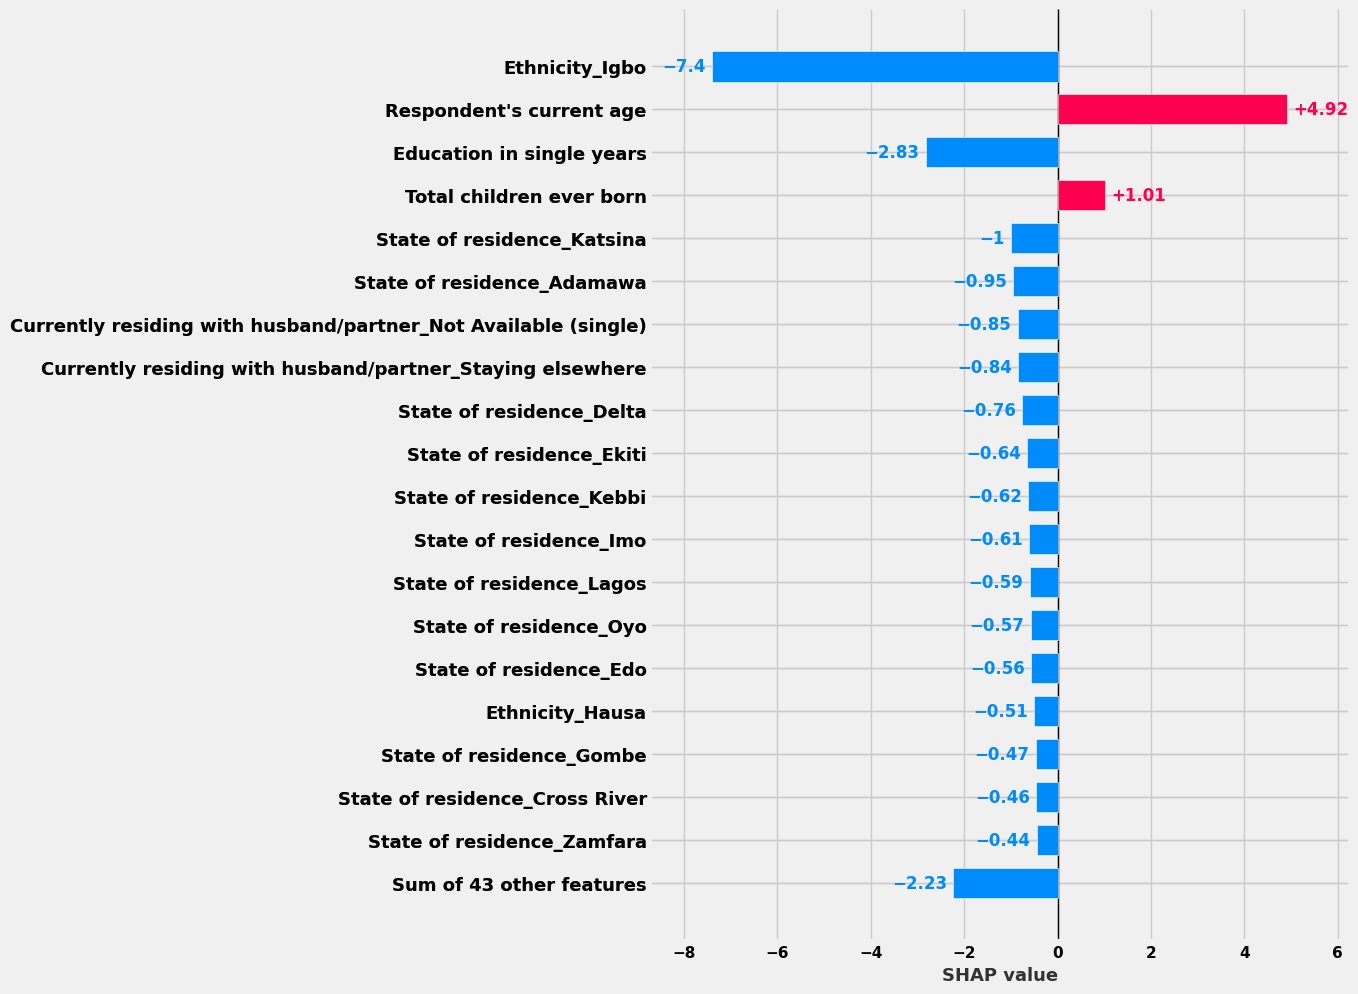

In [110]:

explainer_xgb= shap.Explainer(best_xgb_model, algorithm='tree')
shap_values_xgb = explainer_xgb(X_test)

# Visualize the SHAP values
shap.plots.bar(shap_values_xgb[100], max_display=20)

In [117]:
shap_values_xgb[100]

.values =
array([ 4.9165955e+00, -2.8264871e+00,  1.0134182e+00,  8.0991350e-03,
       -4.0475839e-01, -1.4053408e-02, -2.7750556e-03, -2.3107538e-02,
       -8.5074389e-01, -8.4221482e-01, -9.4992304e-01,  3.4436829e-02,
       -2.0115763e-01, -3.9672470e-01, -6.6702156e-03,  2.2257259e-02,
        1.5180691e-01, -4.6024424e-01, -7.6158559e-01,  9.1057792e-02,
       -5.5792558e-01, -6.4401388e-01, -1.8884726e-01,  1.9007576e-01,
       -4.7158909e-01, -6.1032581e-01, -4.7335392e-03, -3.9447495e-01,
       -3.1904700e-01, -1.0027642e+00, -6.2312406e-01, -4.2796668e-01,
        5.6761213e-02, -5.9253031e-01, -1.9450460e-02, -2.2849195e-01,
        1.3617930e-01, -2.0278487e-02,  1.3284497e-01, -5.7422495e-01,
        2.7093867e-02, -2.8912503e-01,  1.2301182e-01,  9.6550174e-03,
        9.7789958e-02, -4.4464874e-01, -1.6750547e-01, -2.7055349e-04,
       -1.4499560e-01, -5.4431998e-04,  4.9458456e-04, -8.0979858e-03,
       -5.0605166e-01,  1.5642898e-02, -4.7421858e-02, -7.3968973e+